In [1]:
import cv2
import numpy as np


In [2]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')


In [3]:
image = cv2.imread("data/dottedimg2.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# gray = image


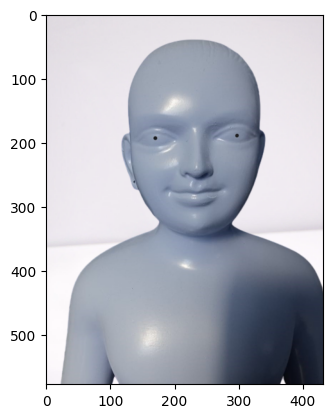

In [4]:
import matplotlib.pyplot as plt
plt.imshow(image)

In [5]:
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

In [6]:
for (x, y, w, h) in faces:
    # print(f"FACE FOUND {x} {y} {w} {h}")
    # face_roi = gray[y:y+h, x:x+w]  # Extract the region of interest for the face
    face_roi = gray[y:y+(h*10//18), x:x+w]  # Extract the region of interest for the face
    
    # Apply a threshold to the face region to create a binary image with black dots represented as white pixels
    _, binary_image = cv2.threshold(face_roi, 45, 100, cv2.THRESH_BINARY_INV)
    
    # Find contours in the binary image
    contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Iterate over the contours and filter out the small ones (if needed)
    min_contour_area = 10  # Minimum size of the contour to consider
    filtered_contours = [contour for contour in contours if cv2.contourArea(contour) > min_contour_area]
    
    # Get the center coordinates of each contour
    dot_centers = []
    for contour in filtered_contours:
        M = cv2.moments(contour)
        cx = int(M["m10"] / M["m00"])
        cy = int(M["m01"] / M["m00"])
        dot_centers.append((cx + x, cy + y))  # Add the face offset to the center coordinates
    
    # Draw a circle around each black dot on the face
    for center in dot_centers:
        cv2.circle(image, center, radius=3, color=(0, 0, 255), thickness=2)


In [7]:
cv2.imshow("Detected Black Dots", image)
cv2.waitKey(0)
cv2.destroyAllWindows()

